In [1]:
from impedance.models.circuits.elements import element
from impedance.models.circuits import CustomCircuit
import numpy as np
import scipy
import matplotlib.pyplot as plt

@element(num_params=3, units=["Ohm", "F", ""],overwrite=True)
def TLMunix(p,f):
    omega = 2 * np.pi * np.array(f)
    R1, Q, alpha = p[0], p[1], p[2]
    Z= 2*np.sqrt(R1/((omega*1j)**alpha*Q))*(1/(np.tanh(np.sqrt((1j*omega)**alpha*R1*Q))))
    return Z

[1000, 0.001, 1]
[1000, 0.001, 1]
[1000, 0.001, 1]


C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\impedance\models\circuits\circuits.py:144: UserWarning: Simulating circuit based on initial parameters
  warnings.warn("Simulating circuit based on initial parameters")


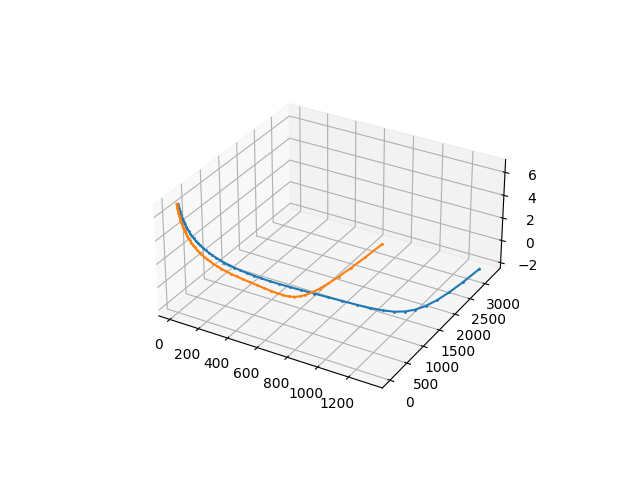

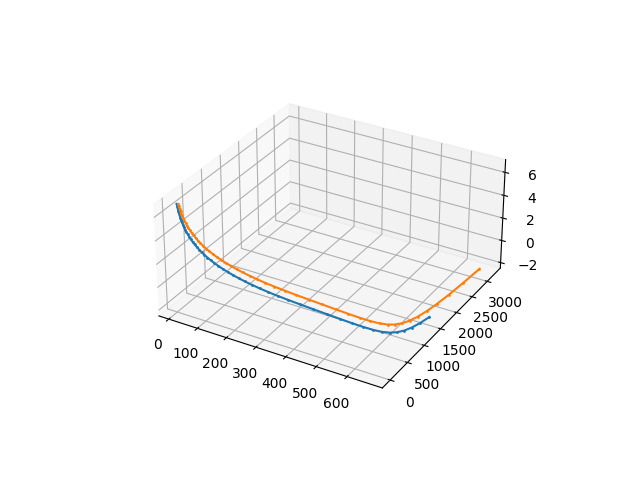

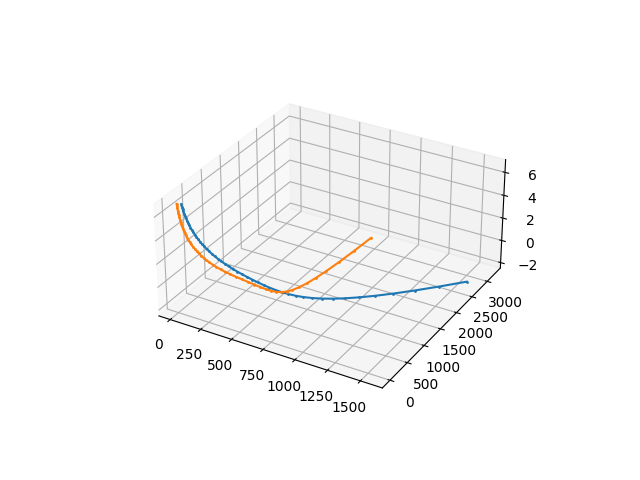

In [2]:
%matplotlib ipympl
from impedance.models.circuits import CustomCircuit
import numpy as np
import matplotlib.pyplot as plt
from models import *

# c = CustomCircuit(initial_guess=[100,1e-3],circuit="p(R_1,C_1)")
# z_exp=c.predict(frequencies=np.logspace(-2,3,100))

# plt.plot(np.real(z_exp),-np.imag(z_exp),"o",ms=5)
# plt.gca().text(0.5,0.5,"Experimental Data",transform=plt.gca().transAxes)
# plt.gca().set_aspect("equal")

# c2=CustomCircuit(initial_guess=[10,1e-3],circuit="p(R_1,C_1)")
# c2.fit(impedance=z_exp,frequencies=np.logspace(-3,3,100))
# print(c2)

#generate 5 plots (there are total 5 params in the model) , set the base parameters (set the values), tweak the parameters one by one, plot the impedance plots in 2D as well as 3D, (goal is to see the difference in the plots)
freq_list=np.logspace(-1,3,50)

param_names = ["R1","Q","α"]  
base_params = [1000,1e-3,1]
change_multiplier = [2,2,0.8]
c_base = CustomCircuit(initial_guess=base_params,circuit="TLMunix_1")
z_base = c_base.predict(frequencies=freq_list)

# for param_idx,p_name in zip(range(0,len(base_params)),param_names):
#     print(base_params)
#     modified_params = base_params[:]
#     modified_params[param_idx] = base_params[param_idx]*change_multiplier[param_idx]
#     # print(modified_params)
#     c_modified = CustomCircuit(initial_guess=modified_params,circuit="TLMtwox_1")
#     z_modified  = c_modified.predict(frequencies=freq_list)
#     fig, ax = plt.subplots()
#     ax.set_aspect("equal")
#     ax.text(0.5,0.7,p_name)
#     ax.plot(np.real(z_modified),-np.imag(z_modified),".",ms=5,linestyle="-")
#     # z_modified=[]
#     ax.plot(np.real(z_base),-np.imag(z_base),".",ms=5,linestyle="-")


for param_idx,p_name in zip(range(0,len(base_params)),param_names):
    print(base_params)
    modified_params = base_params[:]
    modified_params[param_idx] = base_params[param_idx]*change_multiplier[param_idx]
    # print(modified_params)
    c_modified = CustomCircuit(initial_guess=modified_params,circuit="TLMunix_1")
    z_modified  = c_modified.predict(frequencies=freq_list)
    fig2=plt.figure()
    ax2=fig2.add_subplot(111,projection="3d")
    # ax2.set_aspect("equal")
    # ax2.text(0.5,0.7,p_name)
    ax2.plot(np.real(z_modified),-np.imag(z_modified),np.log(freq_list),".",ms=2,linestyle="-")
    # z_modified=[]
    ax2.plot(np.real(z_base),-np.imag(z_base),np.log(freq_list),".",ms=2,linestyle="-")
    ax2.set_box_aspect([100,100,50])
    # ax2.set_zscale("log")


# fig, ax=plt.subplots()
# ax.set_aspect("equal")
# # ax.set_xlim(0,10000)
# for R1 in [1000,2000]:
#     c1= CustomCircuit(initial_guess=[R1,500,1e-3,0.4,1],circuit="TLMtwox_1")
#     zz=c1.predict(frequencies=np.logspace(-1,3,100))
#     ax.plot(np.real(zz),-np.imag(zz),".",ms=5)

# # plt.gca().text(0.5,0.5,"Experimental Data",transform=plt.gca().transAxes)
    
# for R2 in [1000,2000]:
#     c1= CustomCircuit(initial_guess=[R,500,1e-3,0.4,1],circuit="TLMtwox_1")
#     zz=c1.predict(frequencies=np.logspace(-1,3,100))
#     ax.plot(np.real(zz),-np.imag(zz),".",ms=5)


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 3.4761252917293965e-15
       x: [ 1.000e+02  1.000e-03]
     nit: 6
   direc: [[ 0.000e+00  1.000e+00]
           [-3.443e-05  2.159e-11]]
    nfev: 189
 allvecs: [array([ 1.000e+00,  1.000e+00]), array([ 1.394e+00,  3.190e-02]), array([ 3.533e+01,  1.778e-03]), array([ 9.899e+01,  1.001e-03]), array([ 1.000e+02,  1.000e-03]), array([ 1.000e+02,  1.000e-03]), array([ 1.000e+02,  1.000e-03])]


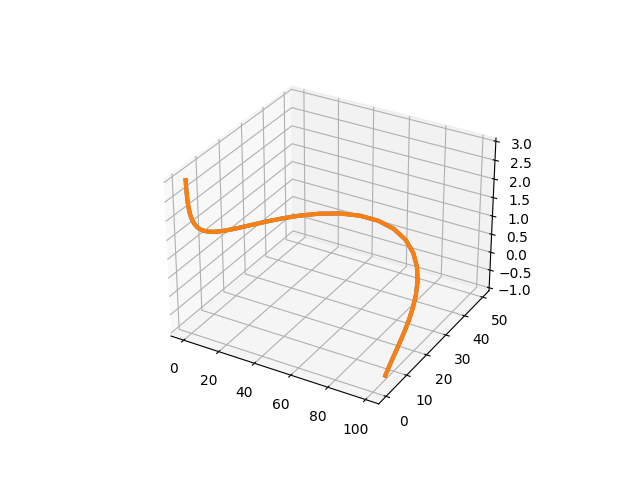

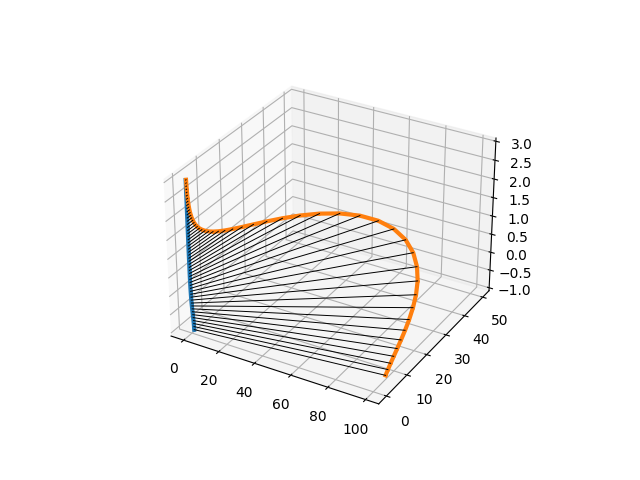

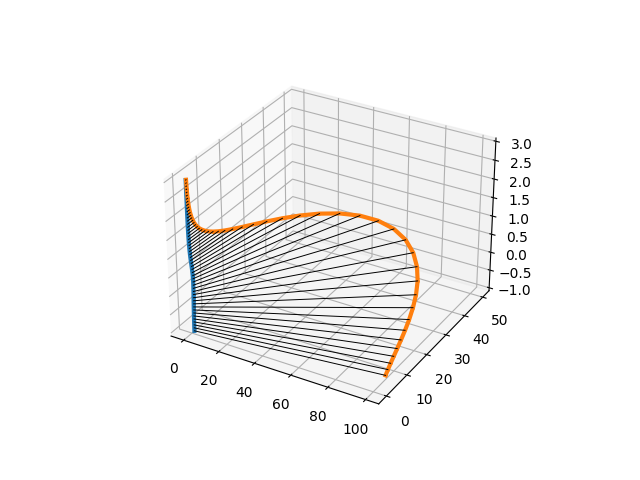

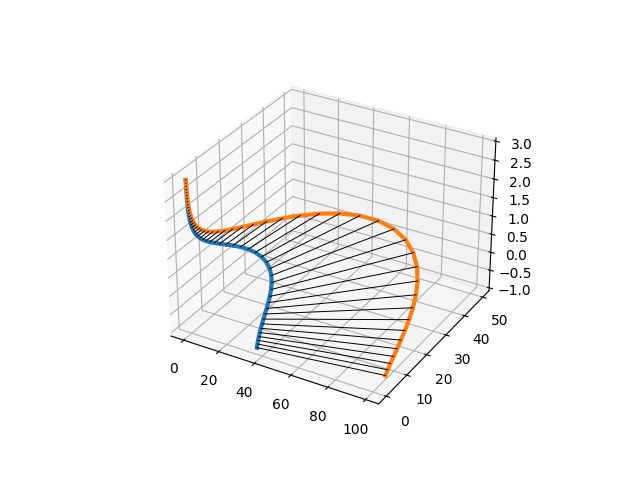

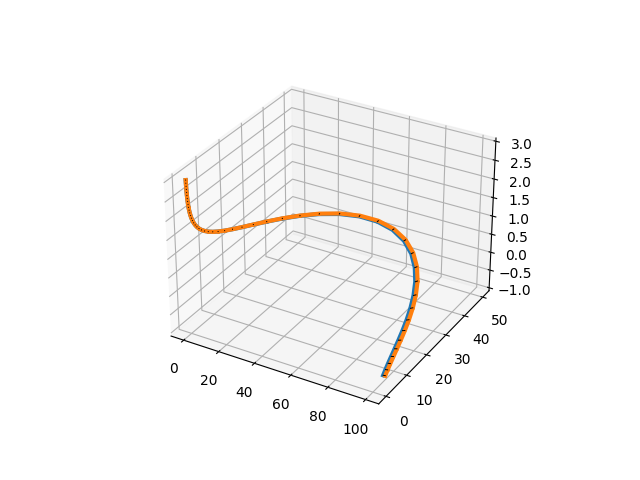

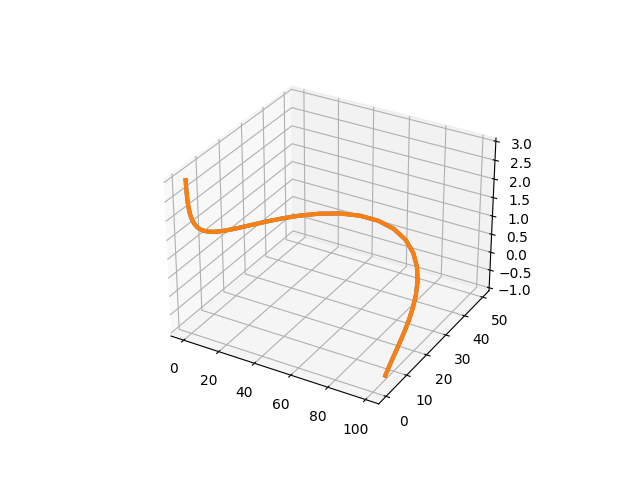

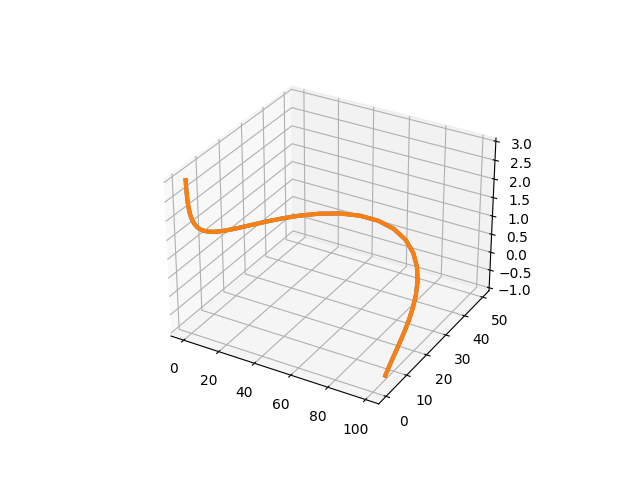

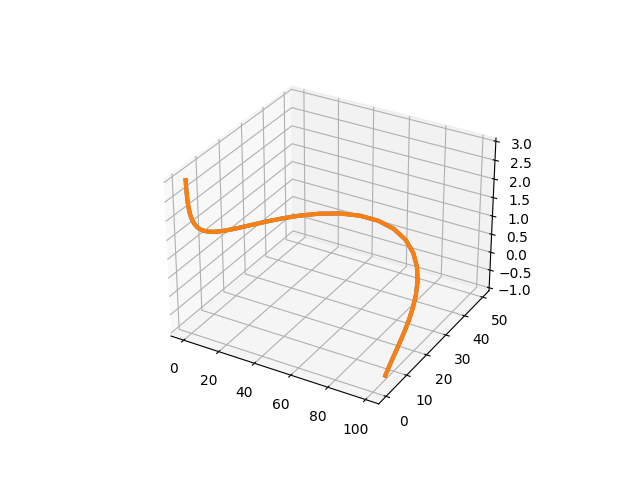

In [36]:
c = CustomCircuit(initial_guess=[100,1e-3],circuit="p(R_1,C_1)")
z_exp=c.predict(frequencies=freq_list)

from scipy.optimize import minimize, least_squares


omega=2*np.pi*freq_list

import numpy as np
def fun(params,omega,z_exp,weights):
    R1=params[0]
    C1=params[1]
    # R0=100 
    # C0=1e-3
    R0=1 
    C0=1
    chi_total=0
    for w,z,wt in zip(omega,z_exp,weights):

        z_model=1/(1/(R1*R0)+1j*(C1*C0)*w)
        chi_real=(np.real(z_model)-np.real(z))**2/wt**2
        chi_imag=(np.imag(z_model)-np.imag(z))**2/wt**2
        chi_total+=(chi_real+chi_imag)

    return chi_total


# omega=np.logspace(-3,3,100)
wt=np.abs(z_exp)
# wt=np.ones(len(z_exp))
wt=omega

result=minimize(fun,(1,1),args=(omega,z_exp,wt),method="Powell",options={'return_all': True})
print(result)

# result2=least_squares(fun,(100,2e-3),args=(omega,z_exp,wt))
# print("#########")
# print(result2)

cc = CustomCircuit(initial_guess=[result.x[0],result.x[1]],circuit="p(R_1,C_1)")
z_fit = cc.predict(frequencies=freq_list)

fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
ax.plot(np.real(z_fit),-np.imag(z_fit),np.log10(freq_list),".",ms=2,linestyle="-",label="Fit",linewidth=3)
ax.plot(np.real(z_exp),-np.imag(z_exp),np.log10(freq_list),".",ms=2,linestyle="-",label="Exp",linewidth=3)
# ax.set_aspect("equal")


for sol in result.allvecs:
    cc = CustomCircuit(initial_guess=[sol[0],sol[1]],circuit="p(R_1,C_1)")
    z_fit = cc.predict(frequencies=freq_list)   
    fig=plt.figure()
    ax=fig.add_subplot(111,projection="3d")
    ax.plot(np.real(z_fit),-np.imag(z_fit),np.log10(freq_list),".",ms=2,linestyle="-",label="Fit",linewidth=3)
    ax.plot(np.real(z_exp),-np.imag(z_exp),np.log10(freq_list),".",ms=2,linestyle="-",label="Exp",linewidth=3)
    for p1,p2,f in zip(z_exp,z_fit,freq_list):
        ax.plot([np.real(p1),np.real(p2)],[-np.imag(p1),-np.imag(p2)],[np.log10(f),np.log10(f)],color="black",linestyle="-",linewidth=0.7)
